TO DO : 

- Improve upon the preprocessing [ADDED]
- Create the pipeline [ADDED]
- Provide parameters [ADDED]
- Try out polynomial regression as well [ADDED]
- make sure all of it makes sense [ADDED]
- do some interpretation at the end.

# Import Libraries & Data

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("preprocessed_airbnb_data.csv")
df.head()

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,room_type_Private room,room_type_Shared room,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,day_type_weekends,price
0,0,1,2.0,0,1,0,0.638184,0.041559,1,0.198180,0.177775,4.166708,6.846473,1,0,0,0,0,0,0,0,0,0,0,0,5.268032
1,0,1,4.0,0,0,0,-1.456366,-0.852751,1,0.018732,0.016614,33.421209,58.342928,1,0,0,0,0,0,0,0,0,0,0,0,5.841356
2,0,1,2.0,0,0,1,-0.409091,-0.629173,1,0.226885,0.255711,3.985908,6.646700,1,0,0,0,0,0,0,0,0,0,0,0,5.576333
3,0,1,4.0,0,0,1,-0.409091,-0.293807,2,0.014635,0.030661,26.119108,60.973565,1,0,0,0,0,0,0,0,0,0,0,0,6.071960
4,0,1,2.0,1,0,0,0.638184,0.600503,1,0.020962,0.022170,29.272733,56.811677,1,0,0,0,0,0,0,0,0,0,0,0,6.185288


# Train Validation and Test splits

Validation set is useful for hyperparameter tuning and model selection.

80% for `training`, 20% for `testing`

I am doing stratfied K fold cross validation in Grid search. Therefore, I will split the data into training and test only. The Grid Search process used kfold to split into training and validation by itself.

In [3]:
len(df.columns)

26

In [4]:
X = df.drop('price', axis=1)
y = df['price']

# split: train + test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (41365, 25)
Testing set shape: (10342, 25)


## Some points to note

- Data being "centered" refers to the process of adjusting the data so that its mean is zero. This is typically done by subtracting the mean of each feature from the respective feature values in the dataset. Centering is a common preprocessing step in various machine learning algorithms, including linear regression, to simplify calculations and improve numerical stability. Centering is particularly important when the scale of the data can affect the performance of the machine learning algorithm.

- I am assuming data has been standardized, feature engineering has been applied. 

- Regularization can be done through some models for linear regression i.e. lasso & ridge regression or elastic net regression.

Loss function that we are using : Squared Error

# Creating Pipelines & Hyperparameter tuning

## Linear Models

### 1. Linear Regression

- `fit_intercept` :  whether to calculate the intercept for the model.
- `normalize` :  X will be normalized before regression.

### 2. Ridge Regression 

- `alpha` : Constant that multiplies the L2 term, controlling regularization strength
- `fit_intercept` :  whether to calculate the intercept for the model.

### 3. Lasso Regression

- `alpha` : Constant that multiplies the L1 term, controlling regularization strength.
- `fit_intercept` :  whether to calculate the intercept for the model.

### 4. Polynomial Regression

- `poly_features__degree` : Choose polynomial degree
- `fit_intercept` :  whether to calculate the intercept for the model.

## Tree Models

### 5. Random Forest Regression

A random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

- `n_estimators`: Number of trees in the forest. Common values are around 100-300, but this can be tuned.
- `max_depth`: Maximum depth of the trees. None means nodes are expanded until all leaves are pure or until they contain fewer than min_samples_split samples.
- `min_samples_split`: Minimum number of samples required to split an internal node. Increasing this value can make the model more robust by reducing overfitting.
- `min_samples_leaf`: Minimum number of samples required to be at a leaf node. A similar effect to min_samples_split.
- `max_features`: Number of features to consider when looking for the best split. Common values include 'auto' (all features), 'sqrt' (square root of the number of features), and 'log2' (logarithm base 2 of the number of features).

### 6. Decision Tree Regression

- `max_depth` : maximum depth of the tree
- `min_samples_split` : minimum number of samples required to split an internal node
- `min_samples_leaf` : minimum number of samples required to be at a leaf node.

### 7. Gradient Boosting Regression

- `n_estimators` : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
- `learning_rate` : Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
- `max_depth` : Maximum depth of the individual regression estimators.
- `min_samples_split` : minimum number of samples required to split an internal node
- `min_samples_leaf` : minimum number of samples required to be at a leaf node

### 8. XGBoost

- `n_estimators`: Number of trees.
- `learning_rate`: Step size shrinkage used to prevent overfitting.
- `max_depth`: Maximum depth of a tree.
- `min_child_weight`: Minimum sum of instance weight needed in a child.
- `subsample`: Subsample ratio of the training instance.
- `colsample_bytree`: Subsample ratio of columns when constructing each tree.

## Support Vector Machine

### 9. Support Vector Regression
- `kernel` : Specifies the kernel type to be used in the algorithm (‘linear’, ‘poly’, ‘rbf’ etc)
- `C` : Regularization parameter. The strength of the regularization is inversely proportional to C. Penalty is a squared l2.
- `gamma` : Kernel coefficient


Note : randomforest, gradient boosting and support vector machine are taking too much time to run.

In [5]:
# Define pipelines for each model
models = {
    'linear_regression': LinearRegression(),
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
    'polynomial_regression': Pipeline([
        ('poly_features', PolynomialFeatures()),
        ('linear_regression', LinearRegression())]),
#     'random_forest': RandomForestRegressor(random_state=42),
    'decision_tree': DecisionTreeRegressor(),
#     'gradient_boosting': GradientBoostingRegressor(),
#       'xgboost': XGBRegressor(objective='reg:squarederror', random_state=42),
#     'support_vector_regression': SVR(),
}

In [8]:
# Define parameter grids for hyperparameter tuning
param_grid = {
    'linear_regression': {'model__fit_intercept': [True, False]},
    'ridge_regression': {'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'model__fit_intercept': [True, False]},
    'lasso_regression': {'model__alpha' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'model__fit_intercept': [True, False]},
    'polynomial_regression': {'model__poly_features__degree': [2, 3]},
#     'random_forest': {
#         'model__n_estimators': [50, 100],
#         'model__max_depth': [None, 10, 20],
#         'model__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#         'model__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#         'model__max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
#     },
    'decision_tree' : {'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]},
#     'gradient_boosting': {
#         'model__n_estimators': [50, 100, 200, 300],
#         'model__learning_rate': [0.01, 0.1, 0.2],
#         'model__max_depth': [3, 5, 7],
#         'model__min_samples_split': [2, 5, 10],
#         'model__min_samples_leaf': [1, 2, 4]
#     },
#     'xgboost': {
#         'model__n_estimators': [100, 200, 300],
#         'model__learning_rate': [0.01, 0.1, 0.2],
#         'model__max_depth': [3, 5, 7],
#         'model__min_child_weight': [1, 3, 5],
#         'model__subsample': [0.6, 0.8, 1.0],
#         'model__colsample_bytree': [0.6, 0.8, 1.0]
#     },
#     'support_vector_regression': {'model__C': [0.1, 1.0, 10.0], 'model__kernel': ['linear', 'rbf'], 'model__gamma':: ['scale', 'auto']},
}

In [9]:
results = []
#Initialize the GridSearchCV results dictionary
grid_search_results = {}

# Create and evaluate pipelines for each model
for model_name, model in models.items():
    start_time = time.time() 
    pipeline = Pipeline([
        ('model', model)
    ])

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid[model_name],
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_squared_error',  # Using negative mean squared error as scoring
        n_jobs=-1
    )

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Store the results
    grid_search_results[model_name] = grid_search
    end_time = time.time()  # End timing
    duration = end_time - start_time  # Calculate duration
    print(f"Time taken to fit {model_name}: {duration} seconds")
    
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best CV Score': grid_search.best_score_,
        'Mean Squared Error': mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)),
        'R^2 Score': r2_score(y_test, grid_search.best_estimator_.predict(X_test)),
        'Time Taken (seconds)': duration
    })

Time taken to fit linear_regression: 2.4991211891174316 seconds
Time taken to fit ridge_regression: 1.1502869129180908 seconds
Time taken to fit lasso_regression: 3.9311068058013916 seconds
Time taken to fit polynomial_regression: 172.27927541732788 seconds
Time taken to fit decision_tree: 21.054436445236206 seconds


In [11]:
results_df = pd.DataFrame(results)
results_df

,Model,Best Parameters,Best CV Score,Mean Squared Error,R^2 Score,Time Taken (seconds)
0,linear_regression,{'model__fit_intercept': True},-0.122173,0.119715,0.667758,2.499121
1,ridge_regression,"{'model__alpha': 0.1, 'model__fit_intercept': ...",-0.122173,0.119717,0.667754,1.150287
2,lasso_regression,"{'model__alpha': 0.001, 'model__fit_intercept'...",-0.125072,0.123253,0.657940,3.931107
3,polynomial_regression,{'model__poly_features__degree': 2},-0.102099,0.101045,0.719572,172.279275
4,decision_tree,"{'model__max_depth': 20, 'model__min_samples_l...",-0.114858,0.098437,0.726811,21.054436


In [68]:
# Evaluate the best model from each GridSearchCV
for model_name, grid_search in grid_search_results.items():
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    test_r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Test MSE = {mse}, Test RMSE = {rmse}, R2 = {test_r2}")

Model: xgboost
Best Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__min_child_weight': 1, 'model__n_estimators': 300, 'model__subsample': 0.8}
Test MSE = 0.06791663004201824, Test RMSE = 0.26060819258422835, R2 = 0.8115130820143786


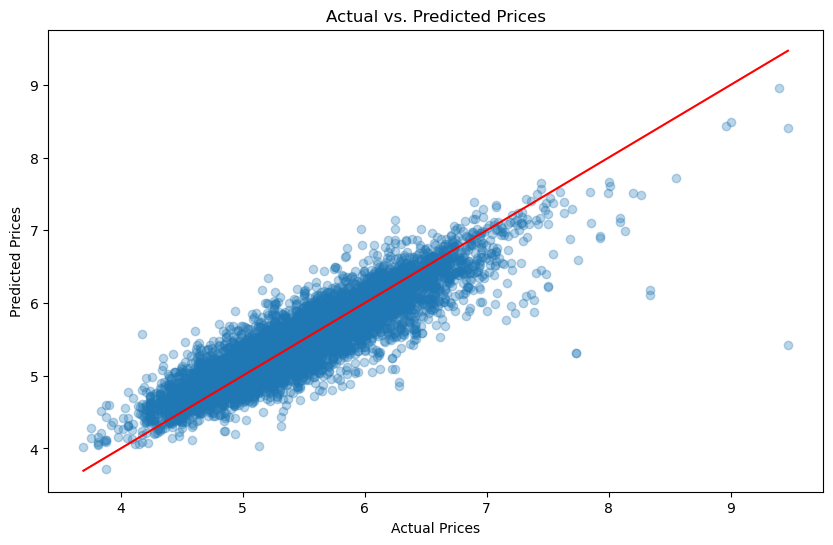

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect predictions line
plt.show()

In [15]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R^2': r2})

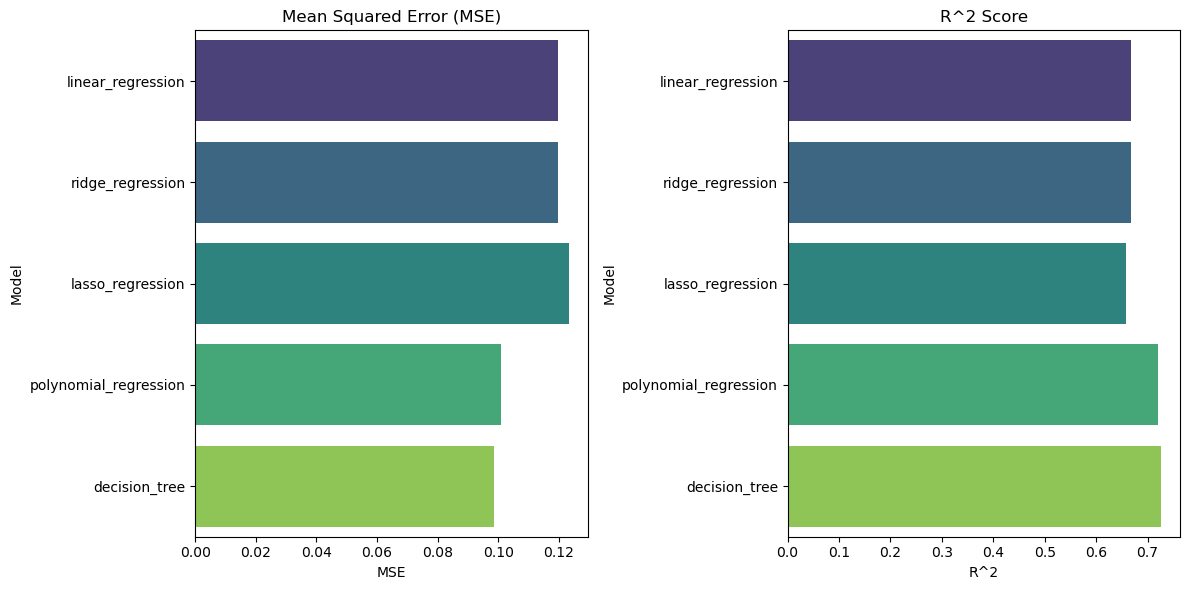

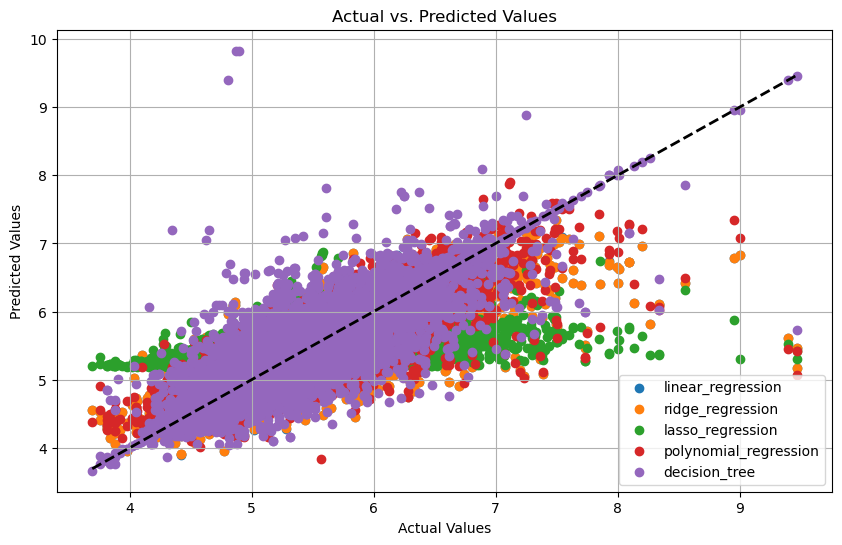

In [16]:
# Plot MSE and R^2 scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Mean Squared Error', y='Model', data=results_df, palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('MSE')
plt.ylabel('Model')

plt.subplot(1, 2, 2)
sns.barplot(x='R^2 Score', y='Model', data=results_df, palette='viridis')
plt.title('R^2 Score')
plt.xlabel('R^2')
plt.ylabel('Model')

plt.tight_layout()
plt.show()

# We create a scatter plot to compare the actual vs. predicted values for each model.
# Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()